In [ ]:
# created by G Oldford
# last edit: March 2024
# Credit to E Olson for original code

In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} -c conda-forge cartopy

import numpy as np
import netCDF4 as nc
import os

from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

import cartopy as crt
from cartopy import feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import datetime as dt
from shapely import geometry
import sys
import scipy.io as sio

import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
#mpl.rc('text', usetex=True)

#mpl.rc('text.latex', preamble = ','.join(r'''
# \usepackage{txfonts}
# \usepackage{lmodern}
# '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [58]:
with nc.Dataset('..//..//data//bathymetry//bathy_salishsea_1500m_20210706.nc') as b:
   # print(mesh.variables)
    navlon=b.variables['nav_lon'][:]
    navlat=b.variables['nav_lat'][:]
    bathy=b.variables['Bathymetry'][:]
#     bathy=np.sum(mesh.variables['bathymetry'][0,:])#*mesh.variables['e3t_0'][0,:,:,:],0)

    tmask=b.variables['Bathymetry'][:,:]
    
with nc.Dataset('..//..//data//grid//coordinates_salishsea_1500m.nc') as coord:
    navlon2=coord.variables['nav_lon'][:]
    navlat2=coord.variables['nav_lat'][:]
    e1t=coord.variables['e1t'][:]
#     navlon=mesh.variables['nav_lon'][:]
#     navlat=mesh.variables['nav_lat'][:]
#     bathy=mesh.variables['Bathymetry'][:]
# #     bathy=np.sum(mesh.variables['bathymetry'][0,:])#*mesh.variables['e3t_0'][0,:,:,:],0)

#     tmask=mesh.variables['Bathymetry'][:,:]
e1t_2 = np.where(e1t > 0, 1, 0)



In [ ]:
mfile2 = sio.loadmat('..//..//data//reference//PNWrivers.mat')
ncst2 = mfile2['ncst']
plt.plot(ncst2[:,0],ncst2[:,1],'grey')

In [59]:
#indices are reversed vertically (bottom to top)
# Ecospace map
ewe_navlat = navlat[102:253,39:]
ewe_navlon = navlon[102:253,39:]

ewe_navlat_shp = ewe_navlat.shape
ewe_navlon_shp = ewe_navlon.shape

print(ewe_navlat_shp)

# print(ewe_navlat[0,0])
# print(ewe_navlat[0,93-1])
# print(ewe_navlat[151-1,0])
# print(ewe_navlat[151-1,93-1])

ewe_navlat_BL = ewe_navlat[0,0]
ewe_navlat_BR = ewe_navlat[0,ewe_navlat_shp[1]-1]
ewe_navlat_TL = ewe_navlat[ewe_navlat_shp[0]-1,0]
ewe_navlat_TR = ewe_navlat[ewe_navlat_shp[0]-1,ewe_navlat_shp[1]-1]

ewe_navlon_BL = ewe_navlon[0,0]
ewe_navlon_BR = ewe_navlon[0,ewe_navlon_shp[1]-1]
ewe_navlon_TL = ewe_navlon[ewe_navlon_shp[0]-1,0]
ewe_navlon_TR = ewe_navlon[ewe_navlon_shp[0]-1,ewe_navlon_shp[1]-1]

print("Ecospace coordinates:")
print("bottom left:")
print(ewe_navlat_BL, "", ewe_navlon_BL)
print("bottom right:")
print(ewe_navlat_BR, "", ewe_navlon_BR)
print("top left:")
print(ewe_navlat_TL, "", ewe_navlon_TL)
print("top right:")
print(ewe_navlat_TR, "", ewe_navlon_TR)

(151, 93)
Ecospace coordinates:
bottom left:
48.29471  -123.80739
bottom right:
48.8222  -122.36933
top left:
50.06544  -125.306526
top right:
50.56847  -123.88653


In [5]:
upperleft_col_ewe = 39 # here we keep all cols to the right during clip
bottomleft_col_ewe = 39
upperrow_ewe = 47 # 1-based indexing in EwE 
lowerrow_ewe = 197

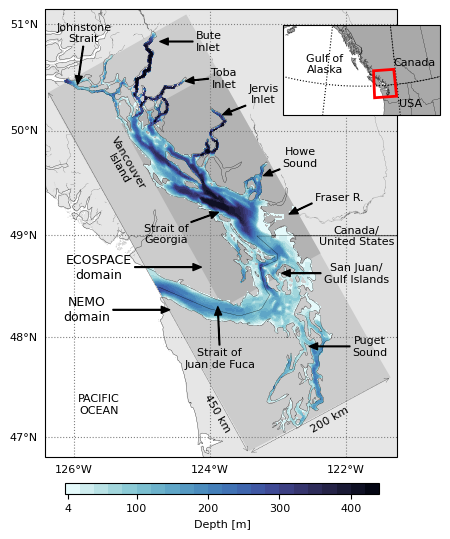

In [92]:
fig = plt.figure(figsize=(7.48,5.3))
#gs = gridspec.GridSpec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
gs = fig.add_gridspec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
cax = fig.add_axes([0.079, 0.075, 0.42, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.052, 0.104, 0.47, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
#ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
ax0.set_extent(xlim + ylim)
imap=True
if imap==True:
    ax0.add_feature(crt.feature.GSHHSFeature('full', linewidth=0.1,edgecolor='darkgray', facecolor=(.9,.9,.9)))
    ax0.add_feature(feature.BORDERS,linewidth=0.2, zorder=10)
    ax0.add_feature(feature.STATES,linewidth=0.2, zorder=10)
    #ocean = ax0.add_feature(feature.OCEAN, linewidth=0.01, zorder=1)
    #ocean._kwargs['facecolor'] = 'lightsteelblue'
    # rivers
    ax0.plot(ncst2[:,0], ncst2[:,1],'grey', zorder=2, transform=crt.crs.PlateCarree(), linewidth=0.1)
    
#     verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
#            [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]

    # study area rectangles
    # nemo bounds
    #TL -126.39, 50.36007
    #TR -124.34939, 51.092396
    #BL -123.42677, 46.864815
    #BR- -121.33768, 47.5994
    verts_nemo=[[-126.39, 50.36007],[-124.34939, 51.092396], [-121.33768, 47.5994],[-123.42677, 46.86]]  
    poly_nemo = geometry.polygon.Polygon(verts_nemo)     
    #p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), edgecolor=None,
    #                     lw=1, zorder=1)
    #p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), color='None', 
    #                     edgecolor="darkgray",lw=1, zorder=10)
    p=ax0.add_geometries([poly_nemo,],crs=crt.crs.PlateCarree(),facecolor=(.8,.8,.8), edgecolor=None,
                         lw=1, zorder=2)
    
    # ecospace bounds
    verts_ecospace=[[ewe_navlon_TL, ewe_navlat_TL],[ewe_navlon_TR, ewe_navlat_TR], 
                     [ewe_navlon_BR, ewe_navlat_BR],[ewe_navlon_BL, ewe_navlat_BL]]
    poly_ecospace = geometry.polygon.Polygon(verts_ecospace)
    p=ax0.add_geometries([poly_ecospace,],crs=crt.crs.PlateCarree(),facecolor=(.7,.7,.7), edgecolor=None,
                         lw=1, zorder=2)
    
    # major lines of long and lat    
#    gl = ax0.gridlines(crs=crt.crs.PlateCarree(), draw_labels=True,
#                   linewidth=1, color='gray', alpha=1, linestyle=':')
    
#     c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,
#         cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
    
#     c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,cmap=cmocean.cm.deep, 
#                      transform=crt.crs.PlateCarree(), zorder=3)
    
    
    c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,cmap=cmocean.cm.ice_r, 
                     transform=crt.crs.PlateCarree(), zorder=3)
    
#     c2 = ax0.contourf(navlon, navlat, bathy,2,vmin=-1,vmax=3.99,cmap='gray', 
#                      transform=crt.crs.PlateCarree(), zorder=3)
    
#     ax0.plot(ncst2[:,0],ncst2[:,1],'grey')
    
#     c2 = ax0.imshow(e1t_2,extent=[navlon.min(), navlon.max(), navlat.min(), navlat.max()], 
#                     cmap='gray', interpolation='nearest', zorder=1000)
    
    mm = ax0.contour(navlon, navlat, tmask.data==-10,levels=[-0.01, 0.01], linewidths=2,
                   colors='darkgray', 
            transform=crt.crs.PlateCarree(), zorder=3)
    
    

#     mm=ax0.contour(navlon, navlat, tmask[0,:],levels=[-0.01, 0.01], linewidths=1,colors='darkgray', 
#                    transform=crt.crs.PlateCarree(), zorder=2)
    
#     p=ax0.plot(thlons,thlats,'r-', transform=crt.crs.PlateCarree(), linewidth=1)
    
    cbar=fig.colorbar(c, cax=cax, label='Depth [m]',ticks=[4,100,200,300,400],orientation='horizontal')
    cax.set_ylim((4/430,1))
    
    arrow_w = 0.5
    
    ax0.annotate('ECOSPACE\ndomain',xy=(-0.32e5,6.19e6),xytext=(-2e5,6.19e6), 
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=9, ha='center', va='center')
    
    ax0.annotate('NEMO\ndomain',xy=(-0.84e5,6.12e6),xytext=(-2.2e5,6.12e6), 
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=9, ha='center', va='center')

    ax0.annotate('Strait of\nGeorgia',xy=(-0.04e5,6.28e6),xytext=(-.9e5,6.23e6),
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Toba\nInlet',xy=(-0.58e5,6.495e6),xytext=(0.05e5,6.485e6),     
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Bute\nInlet',xy=(-1e5,6.56e6),xytext=(-0.2e5,6.56e6),             
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center', va='center')
    
    ax0.annotate('Jervis\nInlet',xy=(0.03e5,6.44e6),xytext=(0.7e5,6.46e6),
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Howe\nSound',xy=(0.7e5,6.34e6),xytext=(1.3e5,6.37e6),
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center', va='center')

    
    ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),             
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center')
    
    ax0.annotate('Strait of\nJuan de Fuca',xy=(-0.05e5,6.125e6),xytext=(-0.02e5,6.04e6),             
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
               
           
    ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),            
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    
    ax0.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.18e6),xytext=(2.22e5,6.18e6),             
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')

    ax0.annotate('Canada/\nUnited States',xy=(2.22e5,6.227e6),ha='center')
    ax0.annotate('PACIFIC\nOCEAN',xy=(-2.0e5,5.95e6),ha='center')  
    
    ax0.annotate('Vancouver\nIsland', xy=(-1.6e5,6.31e6), fontsize=8,ha='center', rotation=300)
    
    ax0.annotate('Fraser R.',xy=(1.121e5,6.277e6),xytext=(1.54e5,6.3e6), 
            arrowprops=dict(facecolor='black', width=arrow_w,headwidth=5,headlength=6),fontsize=8)
    
#     ax0.annotate('200 km',xy=(1.45e5,5.9e6),xytext=(1.3e5,5.9e6), 
#             arrowprops=dict(facecolor='black',arrowstyle='<->'),
#                  fontsize=8)
    
    ax0.annotate('', xytext=(0.46e5,5.884e6), xy=(2.8e5,6.01e6), arrowprops=dict(arrowstyle='<->', 
                                                                                 linestyle='--',
                                                                                 linewidth=0.2
                                                                                ))
    ax0.annotate('200 km', xy=(1.44e5,5.92e6), rotation=30)
    ax0.annotate('', xytext=(0.46e5,5.884e6), xy=(-2.85e5,6.48e6), arrowprops=dict(arrowstyle='<->', 
                                                                                   linestyle='--',
                                                                                   linewidth=0.2
                                                                                  ))
#     ax0.annotate('450 km', xy=(-2.65e5,6.35e6), rotation=300)
    ax0.annotate('450 km', xy=(-0.3e5,5.92e6), rotation=300)
    
    temp=ax0.get_xlim()
    temp2=ax0.get_ylim()
    xlocs=ticker.FixedLocator(np.arange(np.floor(xlim[0]-1), np.ceil(xlim[1])+2,2))
    ylocs = ticker.FixedLocator(np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1))
    gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    a=18

    #Map Inset
    xmap, ymap = [-150, -110], [42, 59]
    ax1 = fig.add_axes([0.37, 0.77, 0.21, 0.21], projection=crt.crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
    ax1.set_extent(xmap + ymap)
    ax1.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray', linewidth=0.1))
    ax1.add_feature(feature.BORDERS,linewidth=0.1, zorder=10)
    ax1.add_feature(feature.STATES,linewidth=0.1, zorder=10)
    ax1.add_patch(Rectangle((xlim[0], ylim[0]), int(np.diff(xlim))+1, int(np.diff(ylim))+1,
                            transform=crt.crs.PlateCarree(), fill=False, edgecolor='r', zorder=10, linewidth=2))
    ax1.text(0.15, 0.47, 'Gulf of\nAlaska', transform=ax1.transAxes)
    ax1.text(0.7, 0.55, 'Canada', transform=ax1.transAxes)
    ax1.text(0.74, 0.1, 'USA', transform=ax1.transAxes)

    xticks, yticks = list(range(-160, -100, 20)), list(range(49, 80, 12))
    ax1.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks, draw_labels=False)
#     ax1.xlabels_top = False
#     ax1.xlabels_left = False
#     ax1.ylabels_left = False
#     ax1.ylabels_right= False
#     ax1.ylabels_top = False
#     ax1.direction = "in"
    ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)    
    
#     gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#     gl.xlabels_top, gl.ylabels_right = False, False
#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER
#     gl.xlabel_style = {'size': 8}
#     gl.ylabel_style = {'size': 8}
    
plt.savefig('../../figs/Fig01.png', dpi=300)
plt.savefig('../../figs/Fig01.pdf', dpi=300)
imap2=True



